## Analysis of Surface Temperature with Land Cover in Louisville Neighborhoods

Resources
[pandas.DataFrame.to_sql](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_sql.html)
[Working with SQLite Databases using Python and Pandas](https://www.dataquest.io/blog/python-pandas-databases)

In [1]:
# Setup - using pandas, matplotlib, sqlite3, seaborn
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns

# Use sqlite Connect function to return a Connection object
con = sqlite3.connect('hotspot.db')
# Create Cursor object in order to execute SQL queries against a database
# Will need this sqlite connection to clean the data - pandas alone just reads.
cur = con.cursor()

# Read csv file
hotspot_df = pd.read_csv('hotspot.csv')

# Create sql database
hotspot_df.to_sql('hotspot_table', con, if_exists='replace', index=False)
# There should be 78 rows
len(hotspot_df)

78

Referenced this [Pandas Column Operations](https://pythonprogramming.net/pandas-column-operations-calculations/) example

In [2]:
# Use pandas and Python to create new column that calculates ratio of impervious to pervious area.
hotspot_df['RATIO_IP'] = hotspot_df.IMP_BARESOIL_PERCENT / (hotspot_df.CANOPY_PERCENT + hotspot_df.VEGETATION_PERCENT)
# Export updated dataframe to table
hotspot_df.to_sql('hotspot_table', con, if_exists="replace")
hotspot_df.head()

,OBJECTID,NH_NAME,ZIP_Codes,UNIQUE,ACRES,HOTSPOT_ACRES,AVE_TEMP_F,CANOPY_PERCENT,VEGETATION_PERCENT,IMP_BARESOIL_PERCENT,RPA_ACRES,OTHERIMP_ACRES,POTENTIAL_PERVIOUS_TREES,POTENTIAL_IMPERVIOUS_TREES,NET_PERVIOUS_TREES,NET_IMPERVIOUS_TREES,RATIO_IP
0,1,Algonquin,"40208, 40210",1,762.62,539.25,96.23,6.90,21.55,71.36,122.19,187.20,"8,053","12,337","4,026",617,2.508260
1,2,Auburndale,40214,2,391.91,17.35,89.87,11.36,17.36,71.42,2.86,6.71,189,442,94,22,2.486769
2,3,Audubon,40213,3,397.78,54.01,91.13,11.87,33.57,54.54,17.25,13.33,"1,136",878,568,44,1.200264
3,4,Avondale Melbourne Heights,"40205, 40220",4,310.1,23.02,91.27,15.11,21.64,63.23,4.80,7.71,316,508,158,25,1.720544
4,5,Bashford Manor,40218,5,355.24,129.52,93.75,13.99,23.06,62.70,28.35,42.36,"1,868","2,792",934,140,1.692308


In [3]:
# Use SQL Select query to obtain scatter plot data
hotspot_df = pd.read_sql_query("SELECT NH_NAME AS 'Neighborhood', AVE_TEMP_F AS 'Average Surface Temperature', CANOPY_PERCENT AS 'Canopy Percent', IMP_BARESOIL_PERCENT AS 'Impervious Ground & Bare Soil Percent', RATIO_IP AS 'Ratio of Impervious to Pervious Surfaces' FROM hotspot_table WHERE CANOPY_PERCENT > 0", con)
hotspot_df.head()

,Neighborhood,Average Surface Temperature,Canopy Percent,Impervious Ground & Bare Soil Percent,Ratio of Impervious to Pervious Surfaces
0,Algonquin,96.23,6.90,71.36,2.508260
1,Auburndale,89.87,11.36,71.42,2.486769
2,Audubon,91.13,11.87,54.54,1.200264
3,Avondale Melbourne Heights,91.27,15.11,63.23,1.720544
4,Bashford Manor,93.75,13.99,62.70,1.692308


Scatter plots below are made with pandas and Seaborn Python data visualization library. Referenced [pandas.DataFrame.plot.scatter](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html) and example in [seaborn.regplot].(http://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot)

Upgrade to scipy 1.2 if you encounter FutureWarning.
On [FutureWarning](https://stackoverflow.com/questions/52594235/futurewarning-using-a-non-tuple-sequence-for-multidimensional-indexing-is-depre) if scipy isn't version 1.2.

### Correlation of Surface Temperature to Canopy Percent
I initially expected that average surface temperature would reduce with increasing canopy percent, but plot1 below demonstrates demonstrates no correlation. There are many neighborhoods that have lower measured surface temperature with canopy percent below 30% compared to the neighborhood at over 80% canopy.

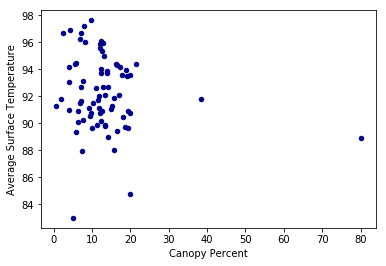

In [4]:
hotspot_df.plot.scatter(x='Canopy Percent', y='Average Surface Temperature', c='DarkBlue')

### Correlation of Surface Temperature to Impervious Ground & Bare Soil
I then tried correlating average surface temperature to combined impervious ground and bare soil percent. Again, there is no correlation. These results suggest that a single category of ground cover alone is not indicative of local temperature.

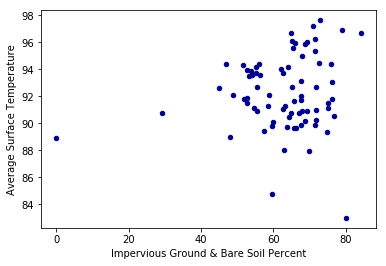

In [5]:
hotspot_df.plot.scatter(x='Impervious Ground & Bare Soil Percent', y='Average Surface Temperature', c='DarkBlue')

### Correlation of average surface temperature to Impervious:Pervious ratio
A ratio of impervious to pervious surfaces captures more information that impacts the average surface temperature, shown below using Seaborn. The higher the ratio, the higher the average local temperature with the exception of a clear outlier.

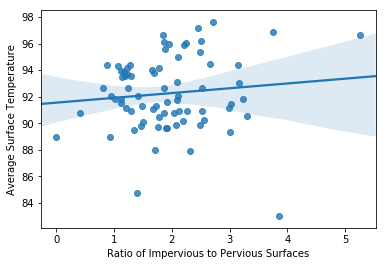

In [6]:
plot = sns.regplot(x='Ratio of Impervious to Pervious Surfaces', y='Average Surface Temperature', data=hotspot_df)